# Laboratorio 2 - Clustering DBSCAN
Brian Vergara Reyes

# Carga de  datos

Se carga un conjunto de datos de clientes con características demográficas y de comportamiento de compra. (edad de los clientes, ingreso anual, gasto promedio mensual en la tienda).

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Generar datos sintéticos de clientes
np.random.seed(0)
n_samples = 300
age = np.random.randint(18, 70, size=n_samples)
income = np.random.randint(20000, 150000, size=n_samples)
spending = np.random.randint(50, 500, size=n_samples)

# Crear DataFrame
data = pd.DataFrame({'Age': age, 'Income': income, 'Spending': spending})


# Exploración de Datos

   Age  Income  Spending
0   62   62521       306
1   65  106339       183
2   18   77191       397
3   21   77852       157
4   21  100675       464
              Age         Income    Spending
count  300.000000     300.000000  300.000000
mean    43.036667   84944.136667  275.320000
std     15.392371   35911.905346  127.487861
min     18.000000   20851.000000   50.000000
25%     29.000000   53315.750000  165.000000
50%     42.000000   86357.000000  264.000000
75%     57.000000  115261.750000  394.000000
max     69.000000  149492.000000  498.000000


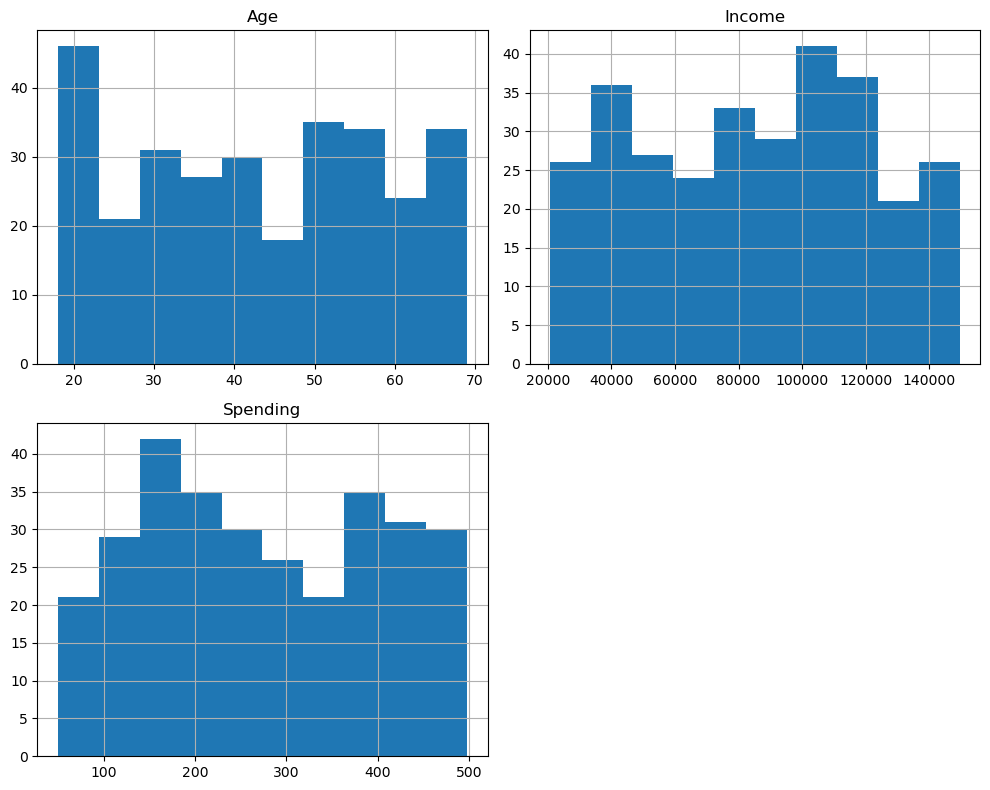

In [6]:
# Visualizar los primeros registros del DataFrame
print(data.head())

# Visualizar estadísticas descriptivas
print(data.describe())

# Visualizar distribución de las características
data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Preprocesamiento

In [7]:
# Normalizar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Implementación de DBSCAN

In [9]:
# Implementación de DBSCAN
eps = 0.3  # Radio del vecindario
min_samples = 5  # Número mínimo de puntos en un vecindario para considerarlo como un núcleo

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(data_scaled)

# Agregar los resultados de clustering al DataFrame original
data['Cluster'] = clusters

# Visualización

Número estimado de clusters: 2
Número estimado de puntos ruido: 288


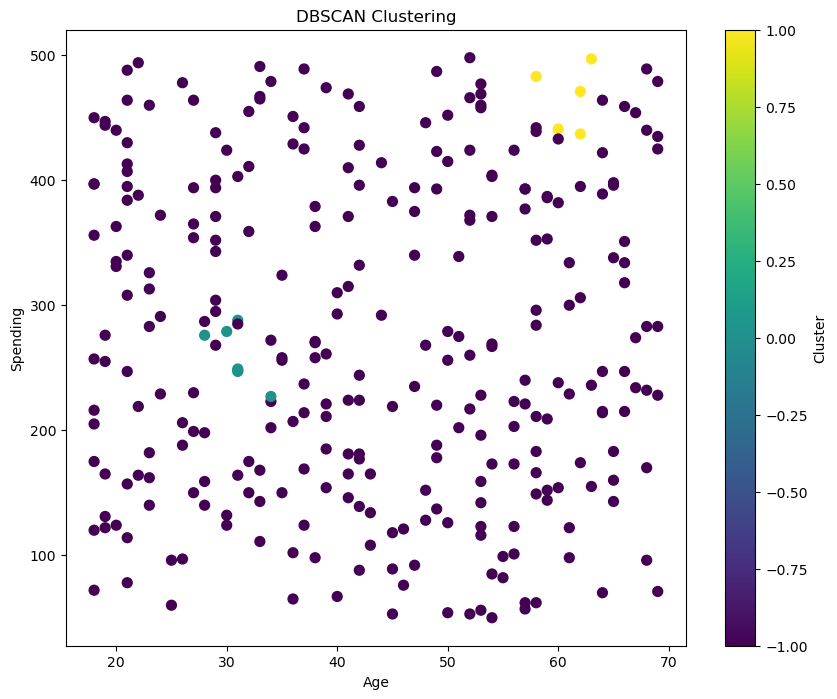

In [12]:
# Contar el número de clusters y puntos ruido
n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise_ = list(clusters).count(-1)

# Imprimir resultados
print('Número estimado de clusters: %d' % n_clusters_)
print('Número estimado de puntos ruido: %d' % n_noise_)

# Visualizar los clusters
plt.figure(figsize=(10, 8))
plt.scatter(data['Age'], data['Spending'], c=data['Cluster'], cmap='viridis', s=50)
plt.xlabel('Age')
plt.ylabel('Spending')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster')
plt.show()

# Interpretación y Discusión

Los puntos en el gráfico representan datos individuales, y están coloreados según el cluster al que fueron asignados por DBSCAN.
Hay un pequeño grupo de puntos amarillos y verdes que han sido identificados como clusters separados.DBSCAN ha identificado estas áreas como regiones de alta densidad separadas por áreas de baja densidad. Los clusters identificados por DBSCAN son relevantes ya que corresponden a grupos de individuos con edades y gastos similares.